In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from IPython.display import display

## 1. load data and put in proper format

### load

In [2]:
df = pd.read_csv("../data/aggregate_data.csv")

In [3]:
multicolumns = [("","iso_3166_2"),("","airports")]
for year in range(2003,2019):
    multicolumns.append((str(year),"f"))
    multicolumns.append((str(year),"s"))
    multicolumns.append((str(year),"p"))
    multicolumns.append((str(year),"avr_d"))
    multicolumns.append((str(year),"intra_euro"))
    

                        
micolumns = pd.MultiIndex.from_tuples(multicolumns)

# 
df = df.loc[1:,]
# add multicolumns
df.columns = micolumns

### add country info

In [4]:
df.loc[df[("","iso_3166_2")].eq("UK"),("","iso_3166_2")] = "GB"  ## the UK is GB in ISO 3166-2
df.loc[df[("","iso_3166_2")].eq("EL"),("","iso_3166_2")] = "GR"  ## Greece

In [5]:
# load from file
iso_codes_europe = pd.read_csv("../data/country_codes.csv")
iso_codes_europe = iso_codes_europe.append({"country":"Turkey",
                         "ISO-3166-2":"TR",
                         "ISO-3166-3": "TUR"},
                       ignore_index=True)

# strip spaces
iso_codes_europe["country"] = iso_codes_europe["country"].str.strip()
# make a dictionary for country-iso pairs
iso_country_dict = dict(zip(iso_codes_europe["ISO-3166-2"].values, iso_codes_europe["country"].values))

In [6]:
## add country name column
df[("","country")] = df[("","iso_3166_2")].apply(lambda x: iso_country_dict[x])
## rearrange collumns
#df = df[["country","iso_3166_2","passengers2018","utilization2018","passengers_total_2003-2018","increase_2003_2013","airports"]]


In [7]:
df = df[pd.MultiIndex.from_tuples([("","country")]+multicolumns)]

## 2. all countries 2008

### create 2018 table

In [8]:
df2018 = pd.concat([df[("","iso_3166_2")].to_frame(),df[("","country")].to_frame(),df["2018"]],axis=1)
df2018.columns = ["iso_3166_2","country","f","s","p","avr_d","intra_euro"]
df2018[["f","s","p","avr_d","intra_euro"]] = df2018[["f","s","p","avr_d","intra_euro"]].astype(float)
df2018["utilization"] = df2018["p"]/df2018["s"]

In [9]:
df2018

,iso_3166_2,country,f,s,p,avr_d,intra_euro,utilization
1,BE,Belgium,105600.0,18072404.0,14084090.0,2061.215970,0.733930,0.779315
2,BG,Bulgaria,32223.0,5492672.0,4576931.0,1557.777354,0.828387,0.833280
3,DK,Denmark,141032.0,21136026.0,16059810.0,1991.270442,0.849505,0.759831
4,DE,Germany,846283.0,138804666.0,108519435.0,2197.755215,0.752209,0.781814
5,EE,Estonia,16311.0,1699129.0,1214964.0,1288.561974,0.884328,0.715051
6,IE,Ireland,115454.0,19808567.0,16469367.0,1874.289732,0.848194,0.831426
7,GR,Greece,62051.0,700903.0,7921856.0,1754.326994,0.918478,11.302357
8,ES,Spain,823849.0,138062315.0,114976661.0,2098.574163,0.885637,0.832788
9,FR,France,727681.0,118405961.0,96368617.0,1997.040375,0.689011,0.813883
10,HR,Croatia,35901.0,4956003.0,3920559.0,1214.477835,0.909714,0.791073


In [10]:
# There is something wrong with the data for greece. Therefore, we drop it
df2018 = df2018.loc[~df2018["iso_3166_2"].eq("GR"),].reset_index(drop=True)

### descriptive stats

#### Top tens

##### number of passengers 2018

In [11]:
pas2018_top10 = (df2018
                  .sort_values(by = "p",ascending=False)
                  .reset_index(drop=True)
                  .loc[0:9,["country","p"]])
pas2018_top10["p"] = pas2018_top10["p"]/1000000 

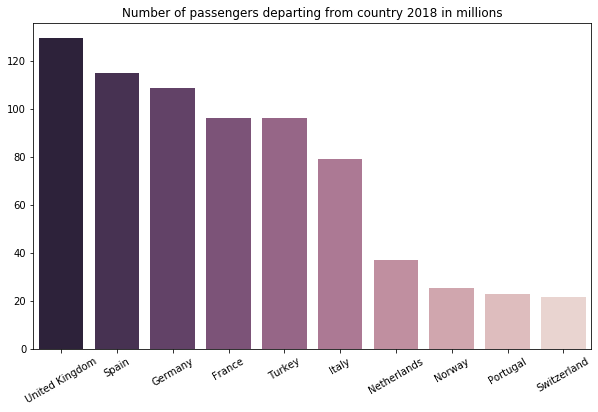

In [12]:
fig, ax = plt.subplots(figsize=(10,6));
sns.barplot(data=pas2018_top10
            ,x= "country"
            ,y= "p"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));
ax.set(xlabel='',
       ylabel='',
       title = "Number of passengers departing from country 2018 in millions");
plt.xticks(rotation=30);

##### number of flights¶

In [13]:
flights2018_top10 = (df2018
                  .sort_values(by = "f",ascending=False)
                  .reset_index(drop=True)
                  .loc[0:9,["country","f"]])
flights2018_top10["f"] = flights2018_top10["f"]/1000 

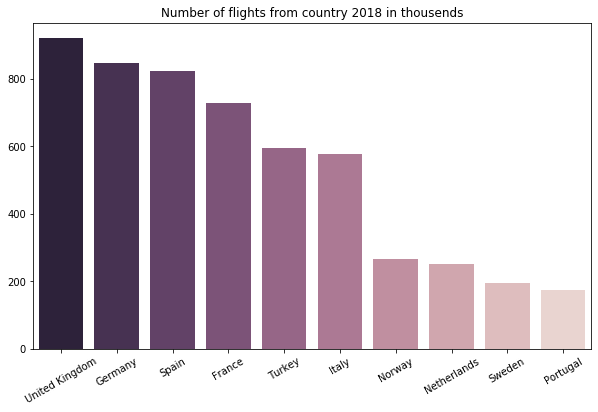

In [14]:
fig, ax = plt.subplots(figsize=(10,6));

sns.barplot(data=flights2018_top10
            ,x= "country"
            ,y= "f"
            ,palette = sns.cubehelix_palette(10,reverse=True)
            ,ax =ax);

ax.set(xlabel='',
       ylabel='',
       title = "Number of flights from country 2018 in thousends");
plt.xticks(rotation=30);


##### utilization

In [15]:
util2018_top5 = (df2018
                  .sort_values(by = "utilization",ascending=False)
                  .reset_index(drop=True)
                  .loc[0:4,["country","utilization"]])

util2018_low5 = (df2018
                  .sort_values(by = "utilization",ascending=True)
                  .reset_index(drop=True)
                  .loc[0:4,["country","utilization"]]
                .sort_values(by = "utilization",ascending=False))


help_df = util2018_top5.copy()
help_df["utilization"] = 0

util2018_top5 = util2018_top5.append(util2018_low5,ignore_index=True)
util2018_low5 = help_df.append(util2018_low5,ignore_index=True)



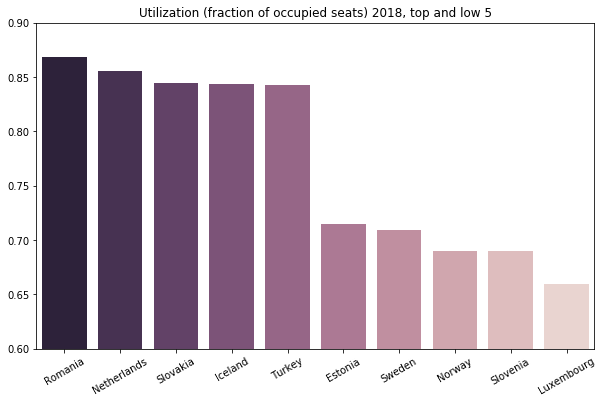

In [16]:
fig, ax = plt.subplots(figsize=(10,6));
sns.barplot(data=util2018_top5
            ,x= "country"
            ,y= "utilization"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));




sns.barplot(data=util2018_low5
            ,x= "country"
            ,y= "utilization"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));

ax.set(xlabel='',
       ylabel='',
       title = "Utilization (fraction of occupied seats) 2018, top and low 5",
       ylim = [0.6,0.9]);



plt.xticks(rotation=30);

#### distances

In [17]:
dist2018_top5 = (df2018
                  .dropna(subset=["avr_d"])
                  .sort_values(by = "avr_d",ascending=False)
                  .reset_index(drop=True)
                  .loc[0:4,["country","avr_d"]])

dist2018_low5 = (df2018
                  .dropna(subset=["avr_d"])
                  .sort_values(by = "avr_d",ascending=True)
                  .reset_index(drop=True)
                  .loc[0:4,["country","avr_d"]]
                .sort_values(by = "avr_d",ascending=False))




help_df = dist2018_top5.copy()
help_df["avr_d"] = 0

dist2018_top5 = dist2018_top5.append(dist2018_low5,ignore_index=True)
dist2018_low5 = help_df.append(dist2018_low5,ignore_index=True)




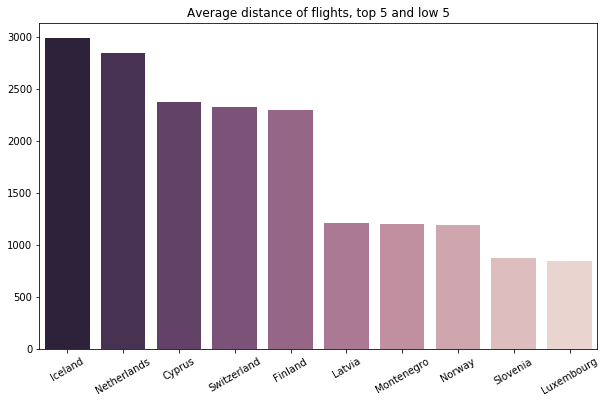

In [18]:
fig, ax = plt.subplots(figsize=(10,6));
sns.barplot(data=dist2018_top5
            ,x= "country"
            ,y= "avr_d"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));

sns.barplot(data=dist2018_low5
            ,x= "country"
            ,y= "avr_d"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));


ax.set(xlabel='',
       ylabel='',
       title = "Average distance of flights, top 5 and low 5");
plt.xticks(rotation=30);


#### inna european

In [19]:
euro2018_top5 = (df2018
                  .dropna(subset=["intra_euro"])
                  .sort_values(by = "intra_euro",ascending=False)
                  .reset_index(drop=True)
                  .loc[0:4,["country","intra_euro"]])

euro2018_low5 = (df2018
                  .dropna(subset=["intra_euro"])
                  .sort_values(by = "intra_euro",ascending=True)
                  .reset_index(drop=True)
                  .loc[0:4,["country","intra_euro"]]
                .sort_values(by = "intra_euro",ascending=False))




help_df = euro2018_top5.copy()
help_df["intra_euro"] = 0

euro2018_top5 = euro2018_top5.append(euro2018_low5,ignore_index=True)
euro2018_low5 = help_df.append(euro2018_low5,ignore_index=True)



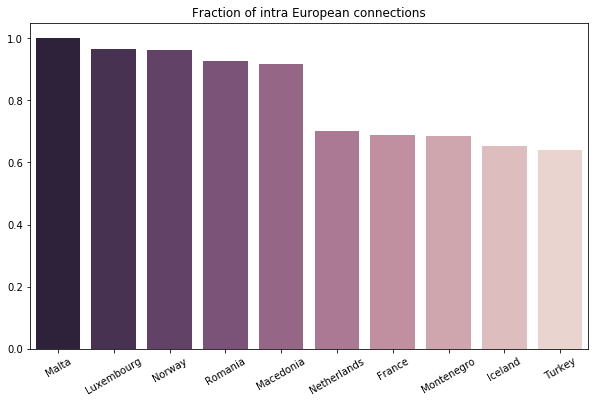

In [20]:
fig, ax = plt.subplots(figsize=(10,6));
sns.barplot(data=euro2018_top5
            ,x= "country"
            ,y= "intra_euro"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));

sns.barplot(data=euro2018_low5
            ,x= "country"
            ,y= "intra_euro"
            ,ax =ax
            ,palette = sns.cubehelix_palette(10,reverse=True));


ax.set(xlabel='',
       ylabel='',
       title = "Fraction of intra European connections");
plt.xticks(rotation=30);

### maps

In [22]:
# location of country shapes
country_geo = r'../data/world-countries.json'

In [89]:
# we need iso-3 codes for plotting
country_codes = pd.read_csv("../data/country_codes.csv").rename(columns = {"ISO-3166-2":"iso_3166_2","ISO-3166-3":"iso_3166_3"})
country_codes = country_codes.append({"country":"Turkey","iso_3166_2":"TR","iso_3166_3":"TUR"},ignore_index=True)
df2018 = df2018.merge(country_codes[["iso_3166_2","iso_3166_3"]],how="left",on = "iso_3166_2")

##### Flights

In [90]:
Europe =  [53.3439,23.0622]

  
# create empty map zoomed in on San Francisco
m = folium.Map(location=Europe, zoom_start=4)

folium.Choropleth(geo_data=country_geo, data=df2018[["iso_3166_3","f"]],
             columns=["iso_3166_3","f"],
             key_on='feature.id',
             fill_color='PuOr', fill_opacity=0.95, line_opacity=0.2,
             legend_name="Number of flights",
             nan_fill_opacity=0.1).add_to(m) 

#folium.LayerControl().add_to(m);
m


#### passengers

In [95]:
# create empty map zoomed in on San Francisco
m = folium.Map(location=Europe, zoom_start=4)

folium.Choropleth(geo_data=country_geo, data=df2018[["iso_3166_3","p"]],
             columns=["iso_3166_3","p"],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.95, line_opacity=0.2,
             legend_name="Number of passengers departing",
             nan_fill_opacity=0.1).add_to(m) 

m.save('europe.html')
m

#### distances

In [26]:
# create empty map zoomed in on San Francisco
m = folium.Map(location=Europe, zoom_start=4)

folium.Choropleth(geo_data=country_geo, data=df2018[["iso_3166_3","avr_d"]],
             columns=["iso_3166_3","avr_d"],
             key_on='feature.id',
             fill_color='PuOr', fill_opacity=0.95, line_opacity=0.2,
             legend_name="Average distances of connections departing from countryls-linkedin@riox.eu",
             nan_fill_opacity=0.1).add_to(m) 

m

#### inna european

In [27]:
# create empty map zoomed in on San Francisco
m = folium.Map(location=Europe, zoom_start=4)

folium.Choropleth(geo_data=country_geo, data=df2018[["iso_3166_3","intra_euro"]],
             columns=["iso_3166_3","intra_euro"],
             key_on='feature.id',
             fill_color='PuOr', fill_opacity=0.95, line_opacity=0.2,
             legend_name="Fraction of intra-Euro connections",
             nan_fill_opacity=0.1).add_to(m) 

m

## 3. compare 4 countries over time: GB, Spain, DE

### preparing the data

In [69]:
df_compare = df.loc[df[("","iso_3166_2")].isin(["GB","ES","DE","TR"]),:].copy()

In [70]:
# data not sufficient for turkey
df_compare.loc[33,["2011"]] # only 2012-2018 not NaN

2011  f                       786987.0
      s                    126016756.0
      p                     94785154.0
      avr_d         2111.4851612161565
      intra_euro    0.8154125694741342
Name: 33, dtype: object

In [71]:
df_compare = df_compare.loc[df[("","iso_3166_2")].isin(["GB","ES","DE"]),:].copy()

#### 1. make timeseries for flights, passengers, util, distance

In [72]:
index_lists = {feature : [(str(year),feature) for year in range(2003,2019)] for feature in ["f","p","s","avr_d"]}

In [73]:
def reduce_multi_index_years(df_in):
    df_out = df_in.copy().astype(float)
    df_out.columns = df_out.columns.get_level_values(0).astype(int)
    
    
    #df_out.index = df_compare[("","iso_3166_2")].values
    #df_out = (df_out.transpose().reset_index()
     #         .rename(columns = {"index":"year"}))
    df_out = df_out.transpose()
    df_out.columns = list(df_compare[("","iso_3166_2")].values)
    df_out = df_out.reset_index().rename(columns = {"index":"year"})
    
    return df_out




df_compare_series = ({feature : reduce_multi_index_years(df_compare[index_lists[feature]])
                      for feature in ["f","p","s","avr_d"]})

In [74]:
#example
df_compare_series["avr_d"].dtypes

year      int64
DE      float64
ES      float64
GB      float64
dtype: object

### make simple plots

#### 1. flights

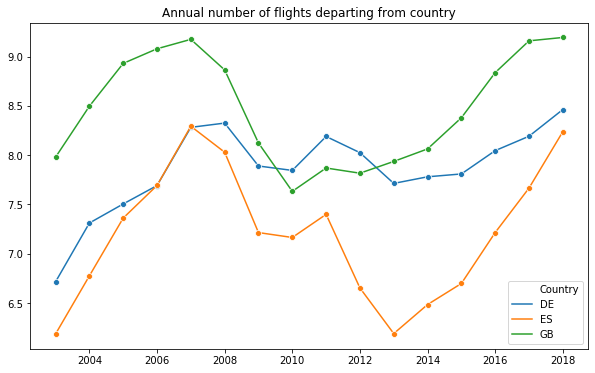

In [96]:
fig, ax = plt.subplots(figsize=(10,6));
sns.lineplot(data=df_compare_series["f"].melt("year",var_name='Country',  value_name='vals')
            ,x= "year"
            ,y= "vals"
            ,hue="Country"
            ,marker="o"
            ,ax =ax);

ax.set(xlabel='',
       ylabel='',
       title = "Annual number of flights departing from country");
#plt.xticks(rotation=30);

#### 2. passengers

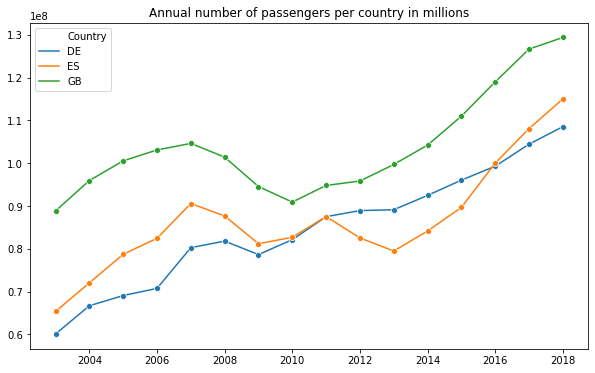

In [62]:
fig, ax = plt.subplots(figsize=(10,6));
sns.lineplot(data=df_compare_series["p"].melt("year",var_name='Country',  value_name='vals')
            ,x= "year"
            ,y= "vals"
            ,hue="Country"
            ,marker = "o"
            ,ax =ax);

ax.set(xlabel='',
       ylabel='',
       title = "Annual number of passengers per country in millions");
#plt.xticks(rotation=30);

#### 3. utilization

In [63]:
# derive utilization from passengers/seats
df_util_series = df_compare_series["p"].copy()
df_util_series[["DE","ES","GB"]] =  df_util_series[["DE","ES","GB"]]/df_compare_series["s"][["DE","ES","GB"]]

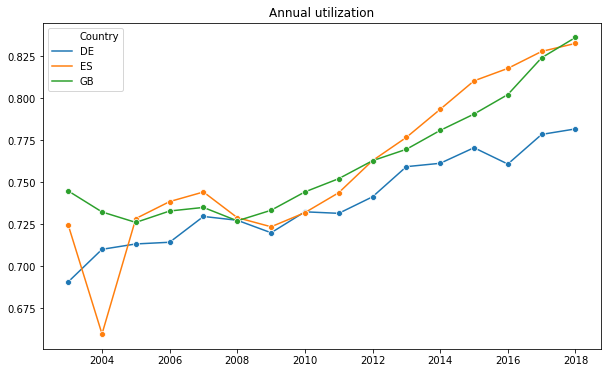

In [64]:
fig, ax = plt.subplots(figsize=(10,6));
sns.lineplot(data=df_util_series.melt("year",var_name='Country',  value_name='vals')
            ,x= "year"
            ,y= "vals"
            ,hue="Country"
            ,marker = "o"
            ,ax =ax);

ax.set(xlabel='',
       ylabel='',
       title = "Annual utilization");

### Multiple in one plot

In [75]:
df_compare_series_rel = df_compare_series.copy()
df_compare_series_rel["p"][["DE","ES","GB"]] = df_compare_series_rel["p"][["DE","ES","GB"]] /1000000
df_compare_series_rel["f"][["DE","ES","GB"]] = df_compare_series_rel["f"][["DE","ES","GB"]] /100000



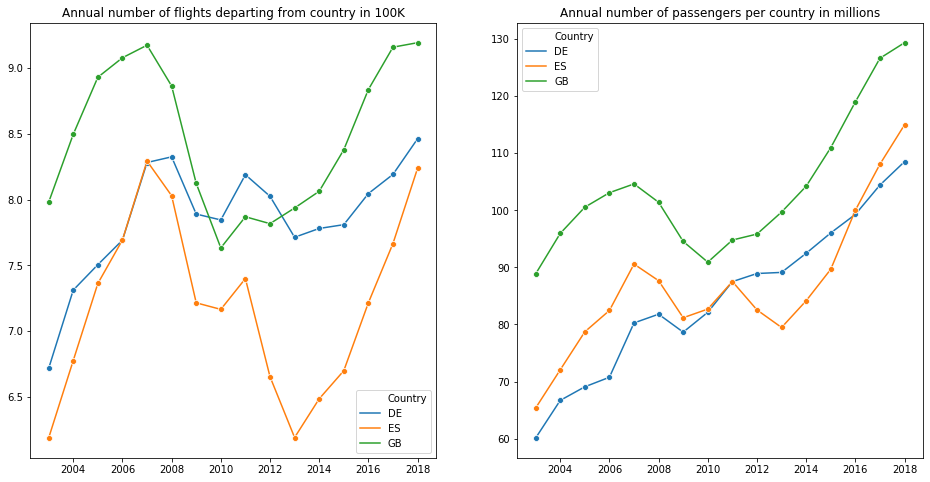

In [76]:
fig, ax = plt.subplots(1,2,figsize=(16,8));
sns.lineplot(data=df_compare_series_rel["f"].melt("year",var_name='Country',  value_name='vals')
            ,x= "year"
            ,y= "vals"
            ,hue="Country"
            ,marker="o"
            ,ax =ax[0]);

ax[0].set(xlabel='',
       ylabel='',
       title = "Annual number of flights departing from country in 100K");


sns.lineplot(data=df_compare_series["p"].melt("year",var_name='Country',  value_name='vals')
            ,x= "year"
            ,y= "vals"
            ,hue="Country"
            ,marker = "o"
            ,ax =ax[1]);

ax[1].set(xlabel='',
       ylabel='',
       title = "Annual number of passengers per country in millions");


In [39]:
    # linear regression for estimate of increase
    #df_by_year["const"] = 1.0
    #df_by_year.reset_index(inplace=True)
    #model = sm.OLS(df_by_year["passenger_d"],df_by_year[["const","year"]]).fit()